In [3]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 

Warning message:
“package ‘broom’ was built under R version 4.

In [4]:
options(repr.matrix.max.rows = 6)
# Load in data and also select out columns related to publication date.
news_data <- read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQqn7Dsf5KqcPHqcwKBwVpLiEczGNRusJeqmw_xhNsheA8anlCokXI7jDfOGfGKwjIENuB7ngwYsAiQ/pub?gid=1905386087&single=true&output=csv") %>%
    mutate(is_weekend = as.factor(is_weekend)) %>%
    filter(!is.na(is_weekend)) %>%
    select(-c(weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday, weekday_is_thursday, weekday_is_friday, weekday_is_saturday, weekday_is_sunday))
news_data

Parsed with column specification:
cols(
  .default = col_double(),
  url = col_character()
)

See spec(...) for full column specifications.



url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.10000000,0.7,-0.3500000,-0.600,-0.2000000,0.5,-0.1875,0.0,0.1875,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.03333333,0.7,-0.1187500,-0.125,-0.1000000,0.0,0.0000,0.5,0.0000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,0.10000000,1.0,-0.4666667,-0.800,-0.1333333,0.0,0.0000,0.5,0.0000,1500
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
http://mashable.com/2014/12/27/son-pays-off-mortgage/,8,10,442,0.5163551,1,0.6441281,24,1,12,⋯,0.1363636,0.5,-0.3564394,-0.8,-0.1666667,0.4545455,0.1363636,0.04545455,0.1363636,1900
http://mashable.com/2014/12/27/ukraine-blasts/,8,6,682,0.5394933,1,0.6926605,10,1,1,⋯,0.0625000,0.5,-0.2052455,-0.5,-0.0125000,0.0000000,0.0000000,0.50000000,0.0000000,1100
http://mashable.com/2014/12/27/youtube-channels-2015/,8,10,157,0.7019868,1,0.8461538,1,1,0,⋯,0.1000000,0.5,-0.2000000,-0.2,-0.2000000,0.3333333,0.2500000,0.16666667,0.2500000,1300


In [5]:
# Separate the training and testing data splits
set.seed(1)
news_split <- initial_split(news_data, prop = 0.5, strata = is_weekend)
news_train <- training(news_split)
news_test <- testing(news_split)
# Note: will need to use a colourblind friendly palette for the graph
glimpse(news_train)

Rows: 19,822
Columns: 54
$ url                           <chr> "http://mashable.com/2013/01/07/astrona…
$ timedelta                     <dbl> 731, 731, 731, 731, 731, 731, 731, 731,…
$ n_tokens_title                <dbl> 9, 13, 10, 11, 10, 9, 10, 9, 9, 12, 13,…
$ n_tokens_content              <dbl> 531, 1072, 370, 97, 231, 1248, 187, 274…
$ n_unique_tokens               <dbl> 0.5037879, 0.4156456, 0.5598886, 0.6701…
$ n_non_stop_words              <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ n_non_stop_unique_tokens      <dbl> 0.6656347, 0.5408895, 0.6981982, 0.8367…
$ num_hrefs                     <dbl> 9, 19, 2, 2, 4, 11, 7, 18, 4, 10, 21, 9…
$ num_self_hrefs                <dbl> 0, 19, 2, 0, 1, 0, 0, 2, 2, 0, 19, 2, 2…
$ num_imgs                      <dbl> 1, 20, 0, 0, 1, 1, 1, 11, 0, 1, 20, 1, …
$ num_videos                    <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 21, 0, 0, 1, 0,…
$ average_token_length          <dbl> 4.404896, 4.682836, 4.359459, 4.855670,…
$ num_keywords             

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



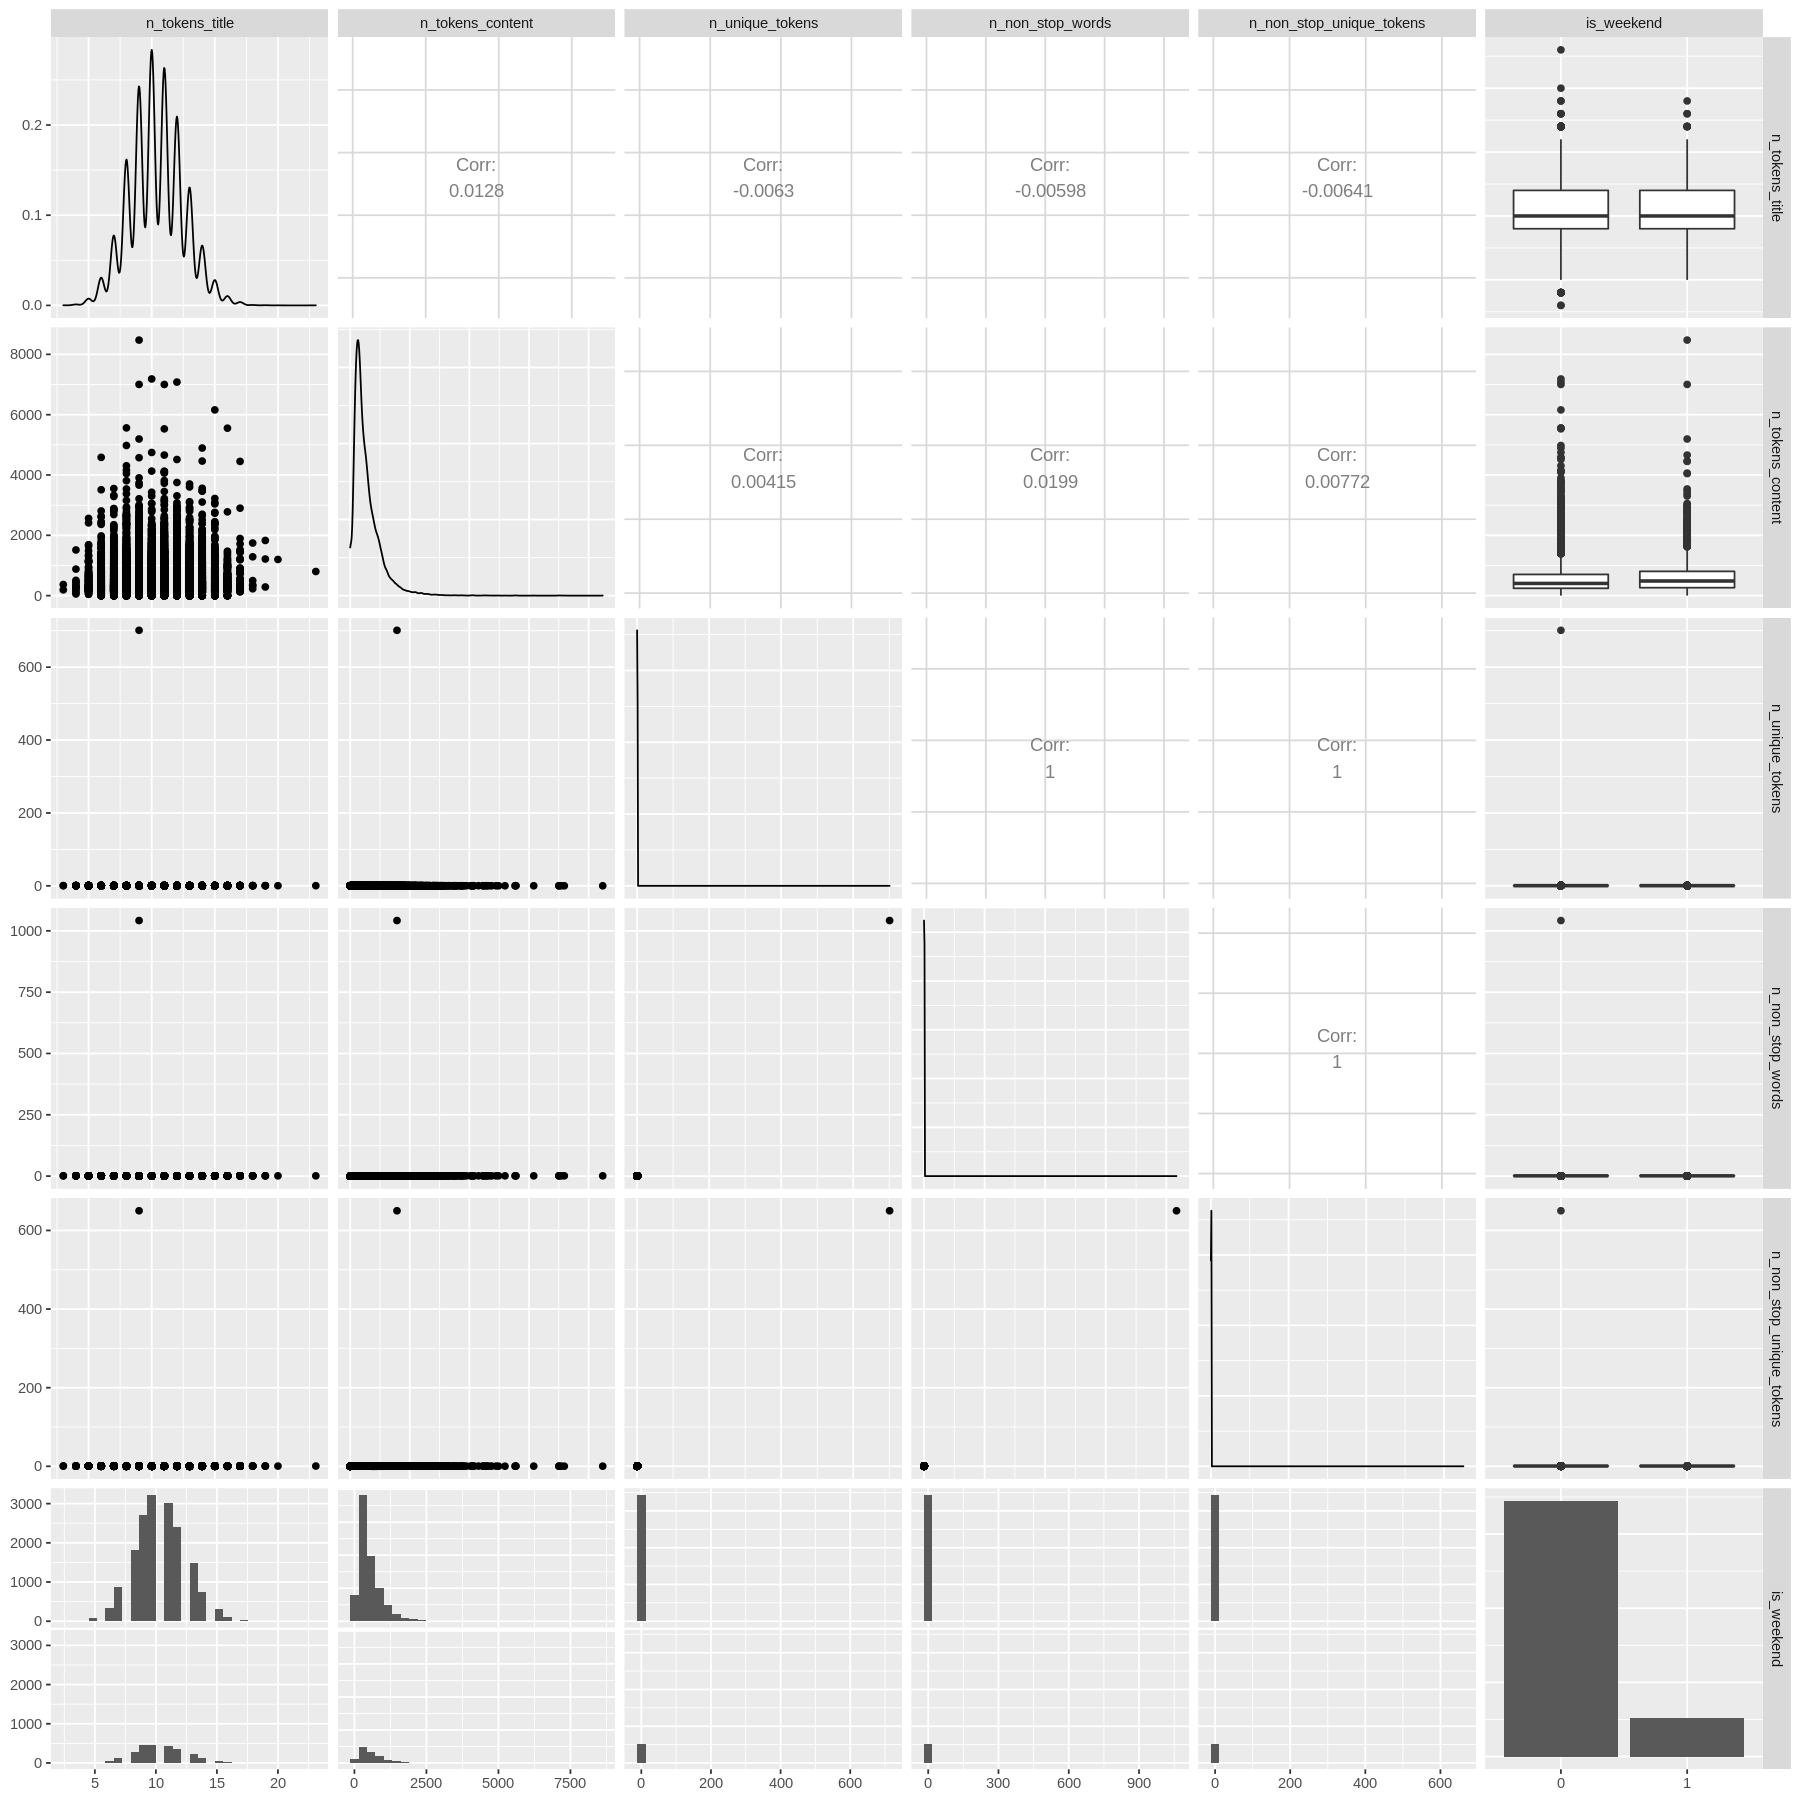

In [6]:
options(repr.plot.width = 15, repr.plot.height = 15)

library(GGally)
news_data_pairs1 <- news_train %>%
  select(n_tokens_title:n_non_stop_unique_tokens, is_weekend) %>%
  ggpairs()
news_data_pairs1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



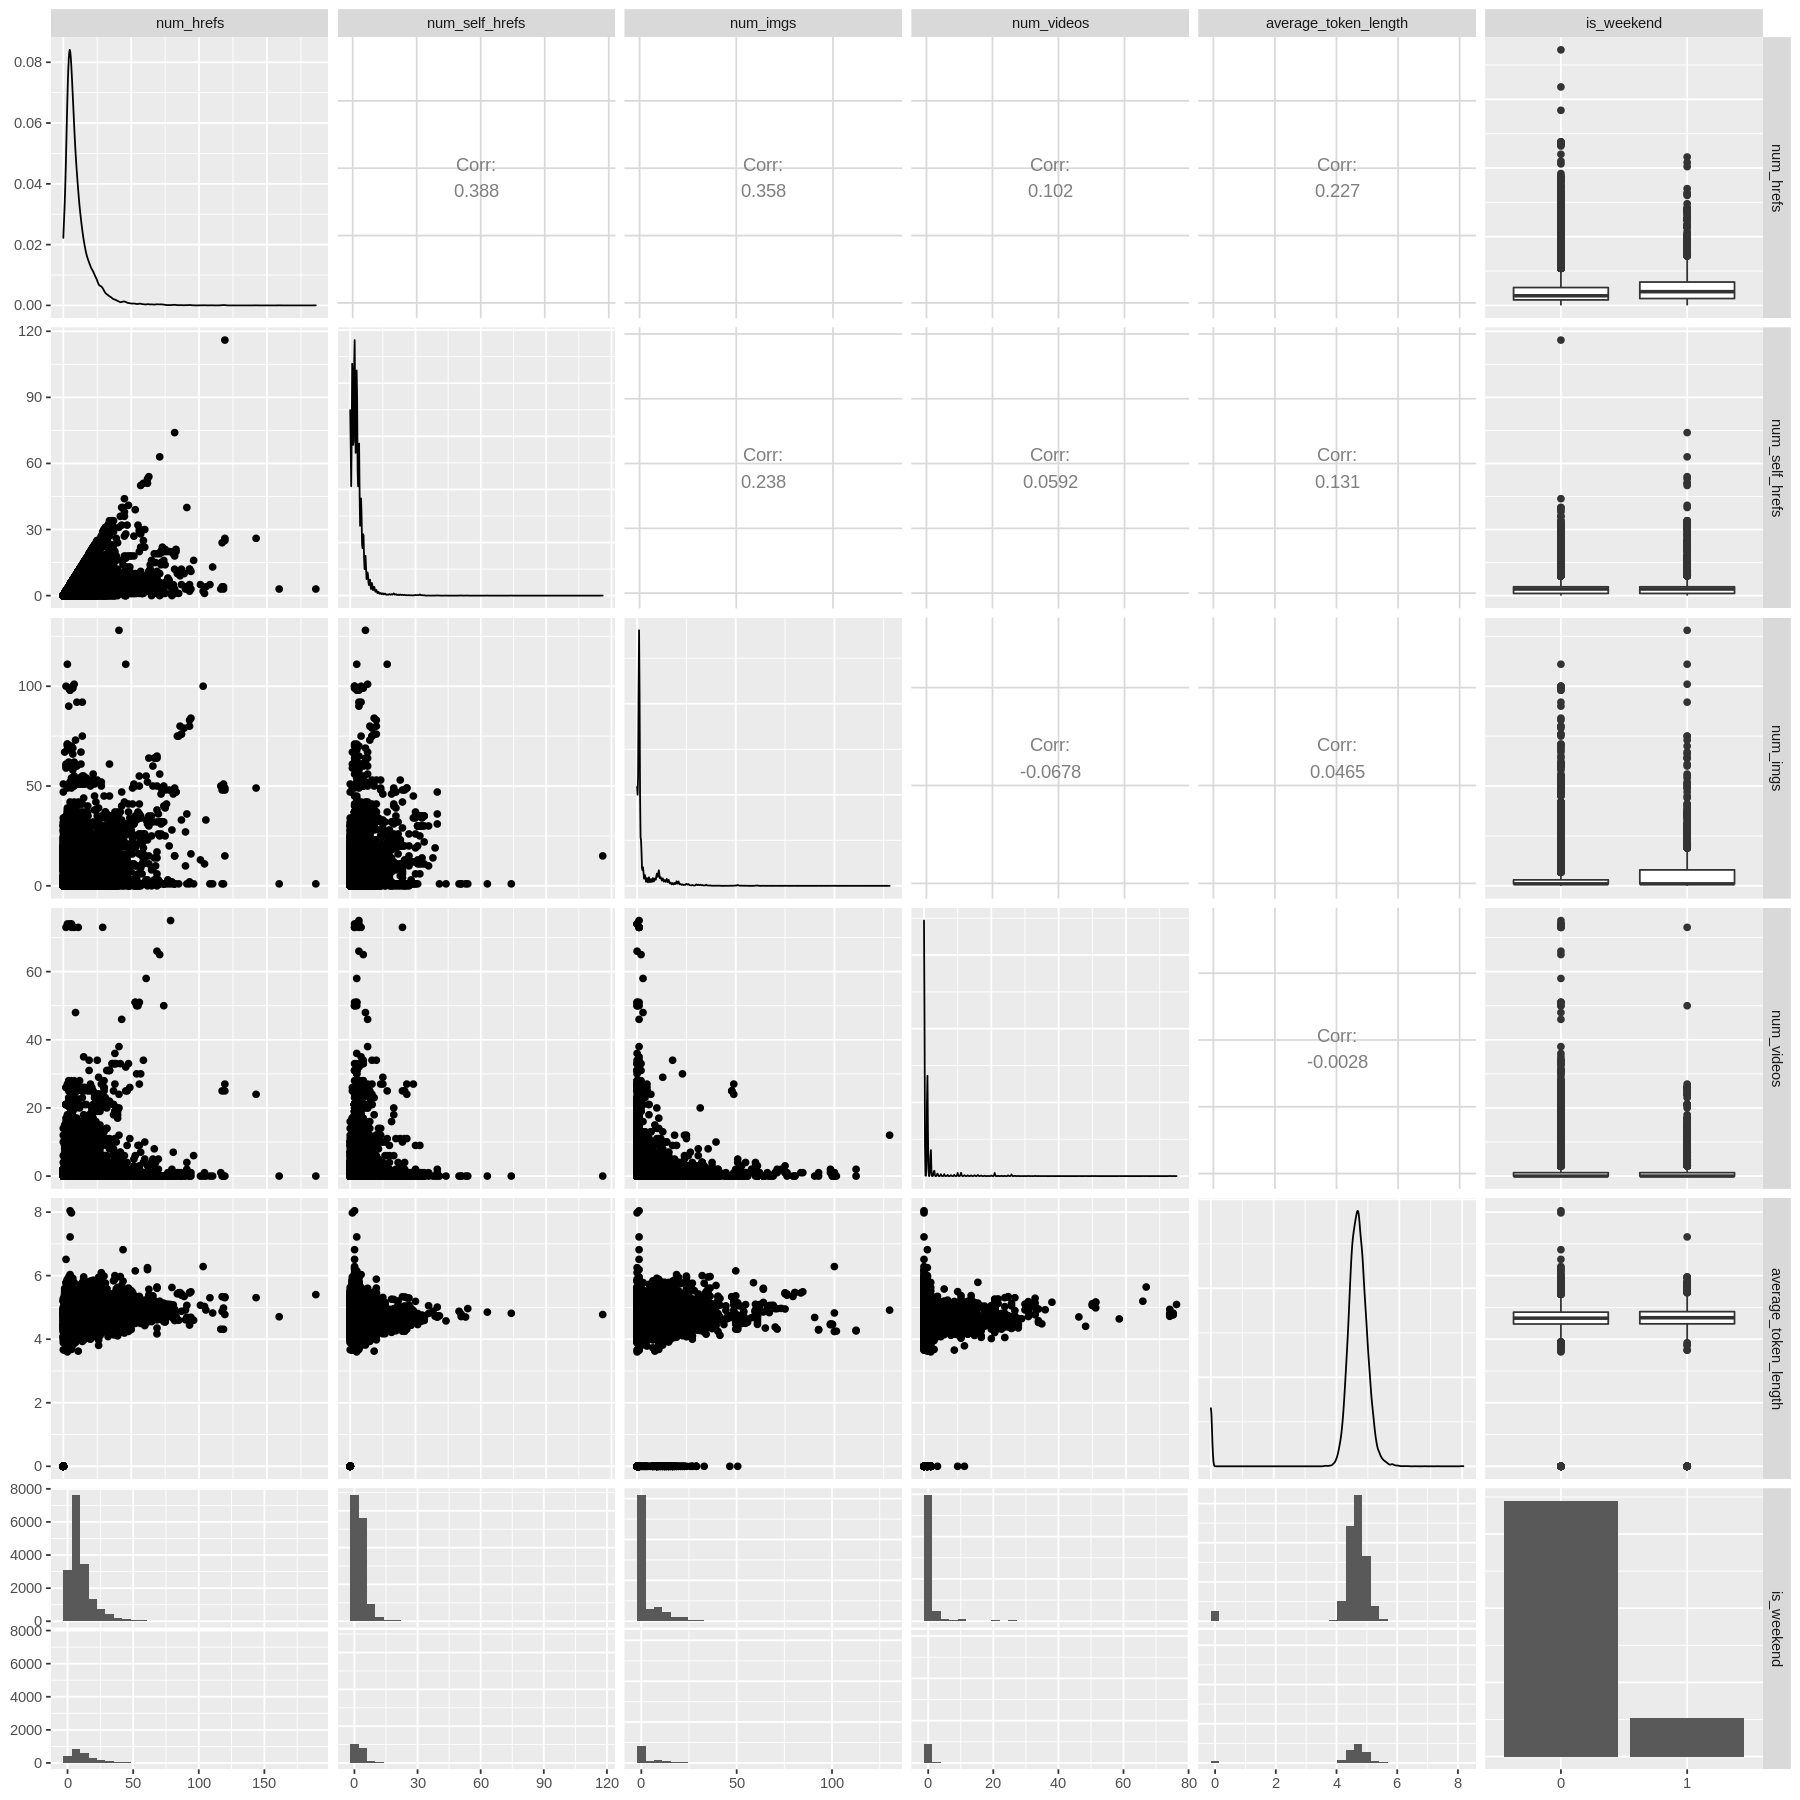

In [7]:
options(repr.plot.width = 15, repr.plot.height = 15)

library(GGally)
news_data_pairs2 <- news_train %>%
  select(num_hrefs:average_token_length, is_weekend) %>%
  ggpairs()
news_data_pairs2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



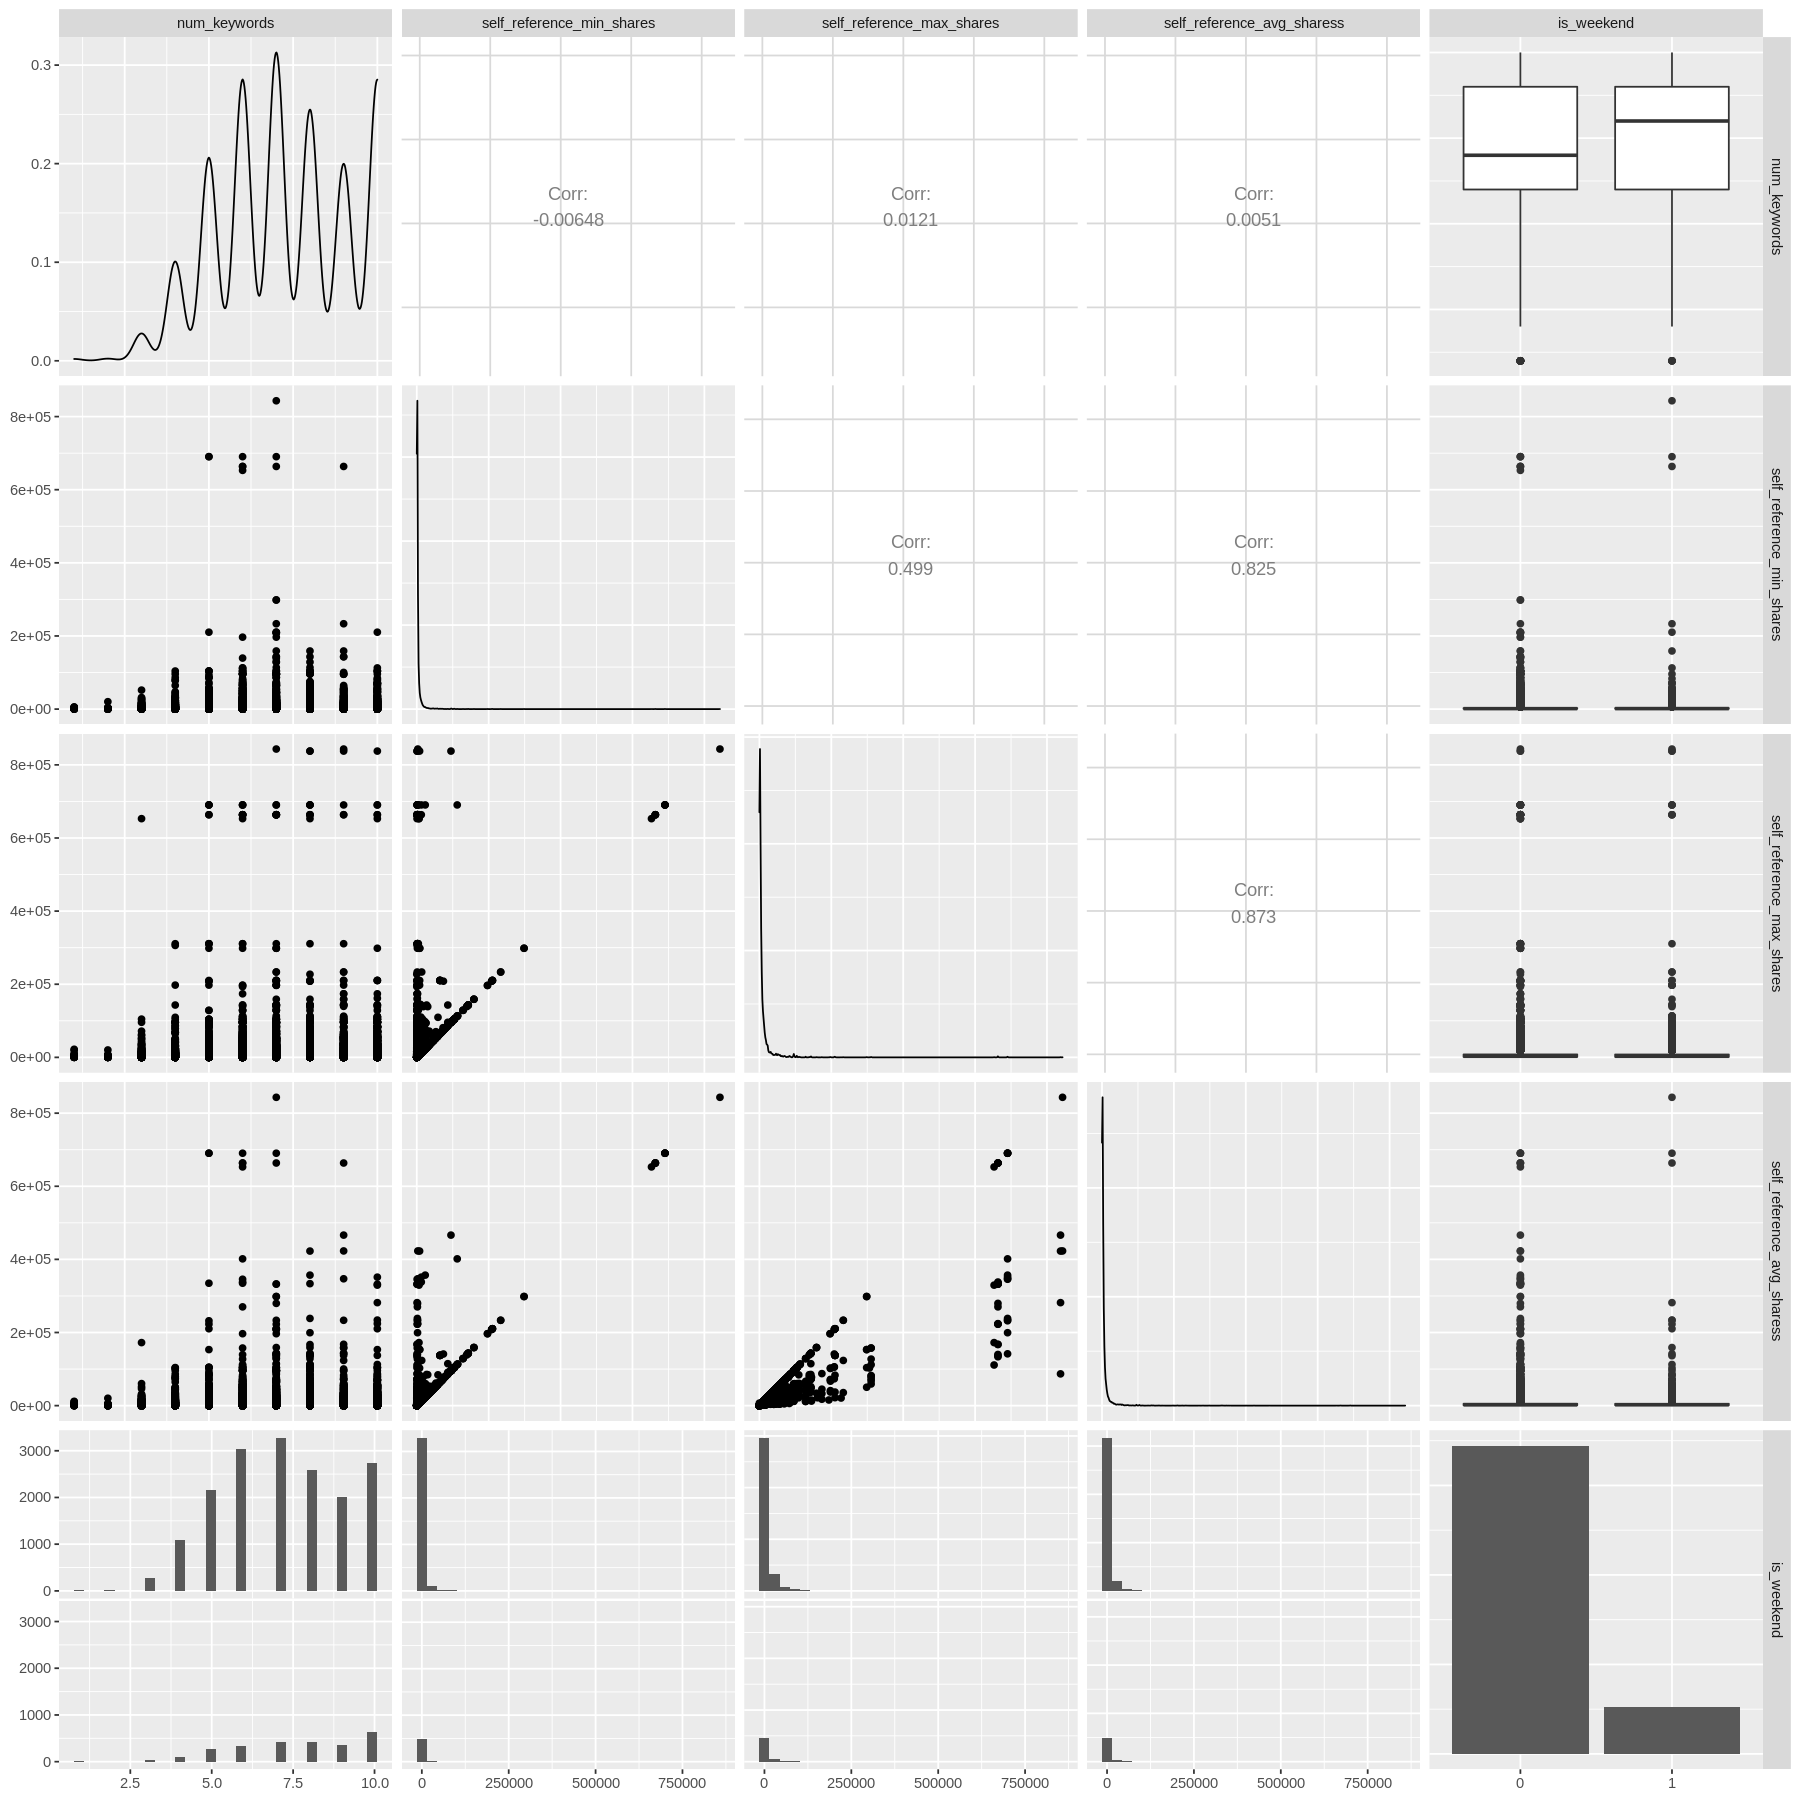

In [8]:
options(repr.plot.width = 15, repr.plot.height = 15)

library(GGally)
news_data_pairs3 <- news_train %>%
  select(num_keywords:self_reference_avg_sharess, -c(data_channel_is_lifestyle:kw_avg_avg), is_weekend) %>%
  ggpairs()
news_data_pairs3

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



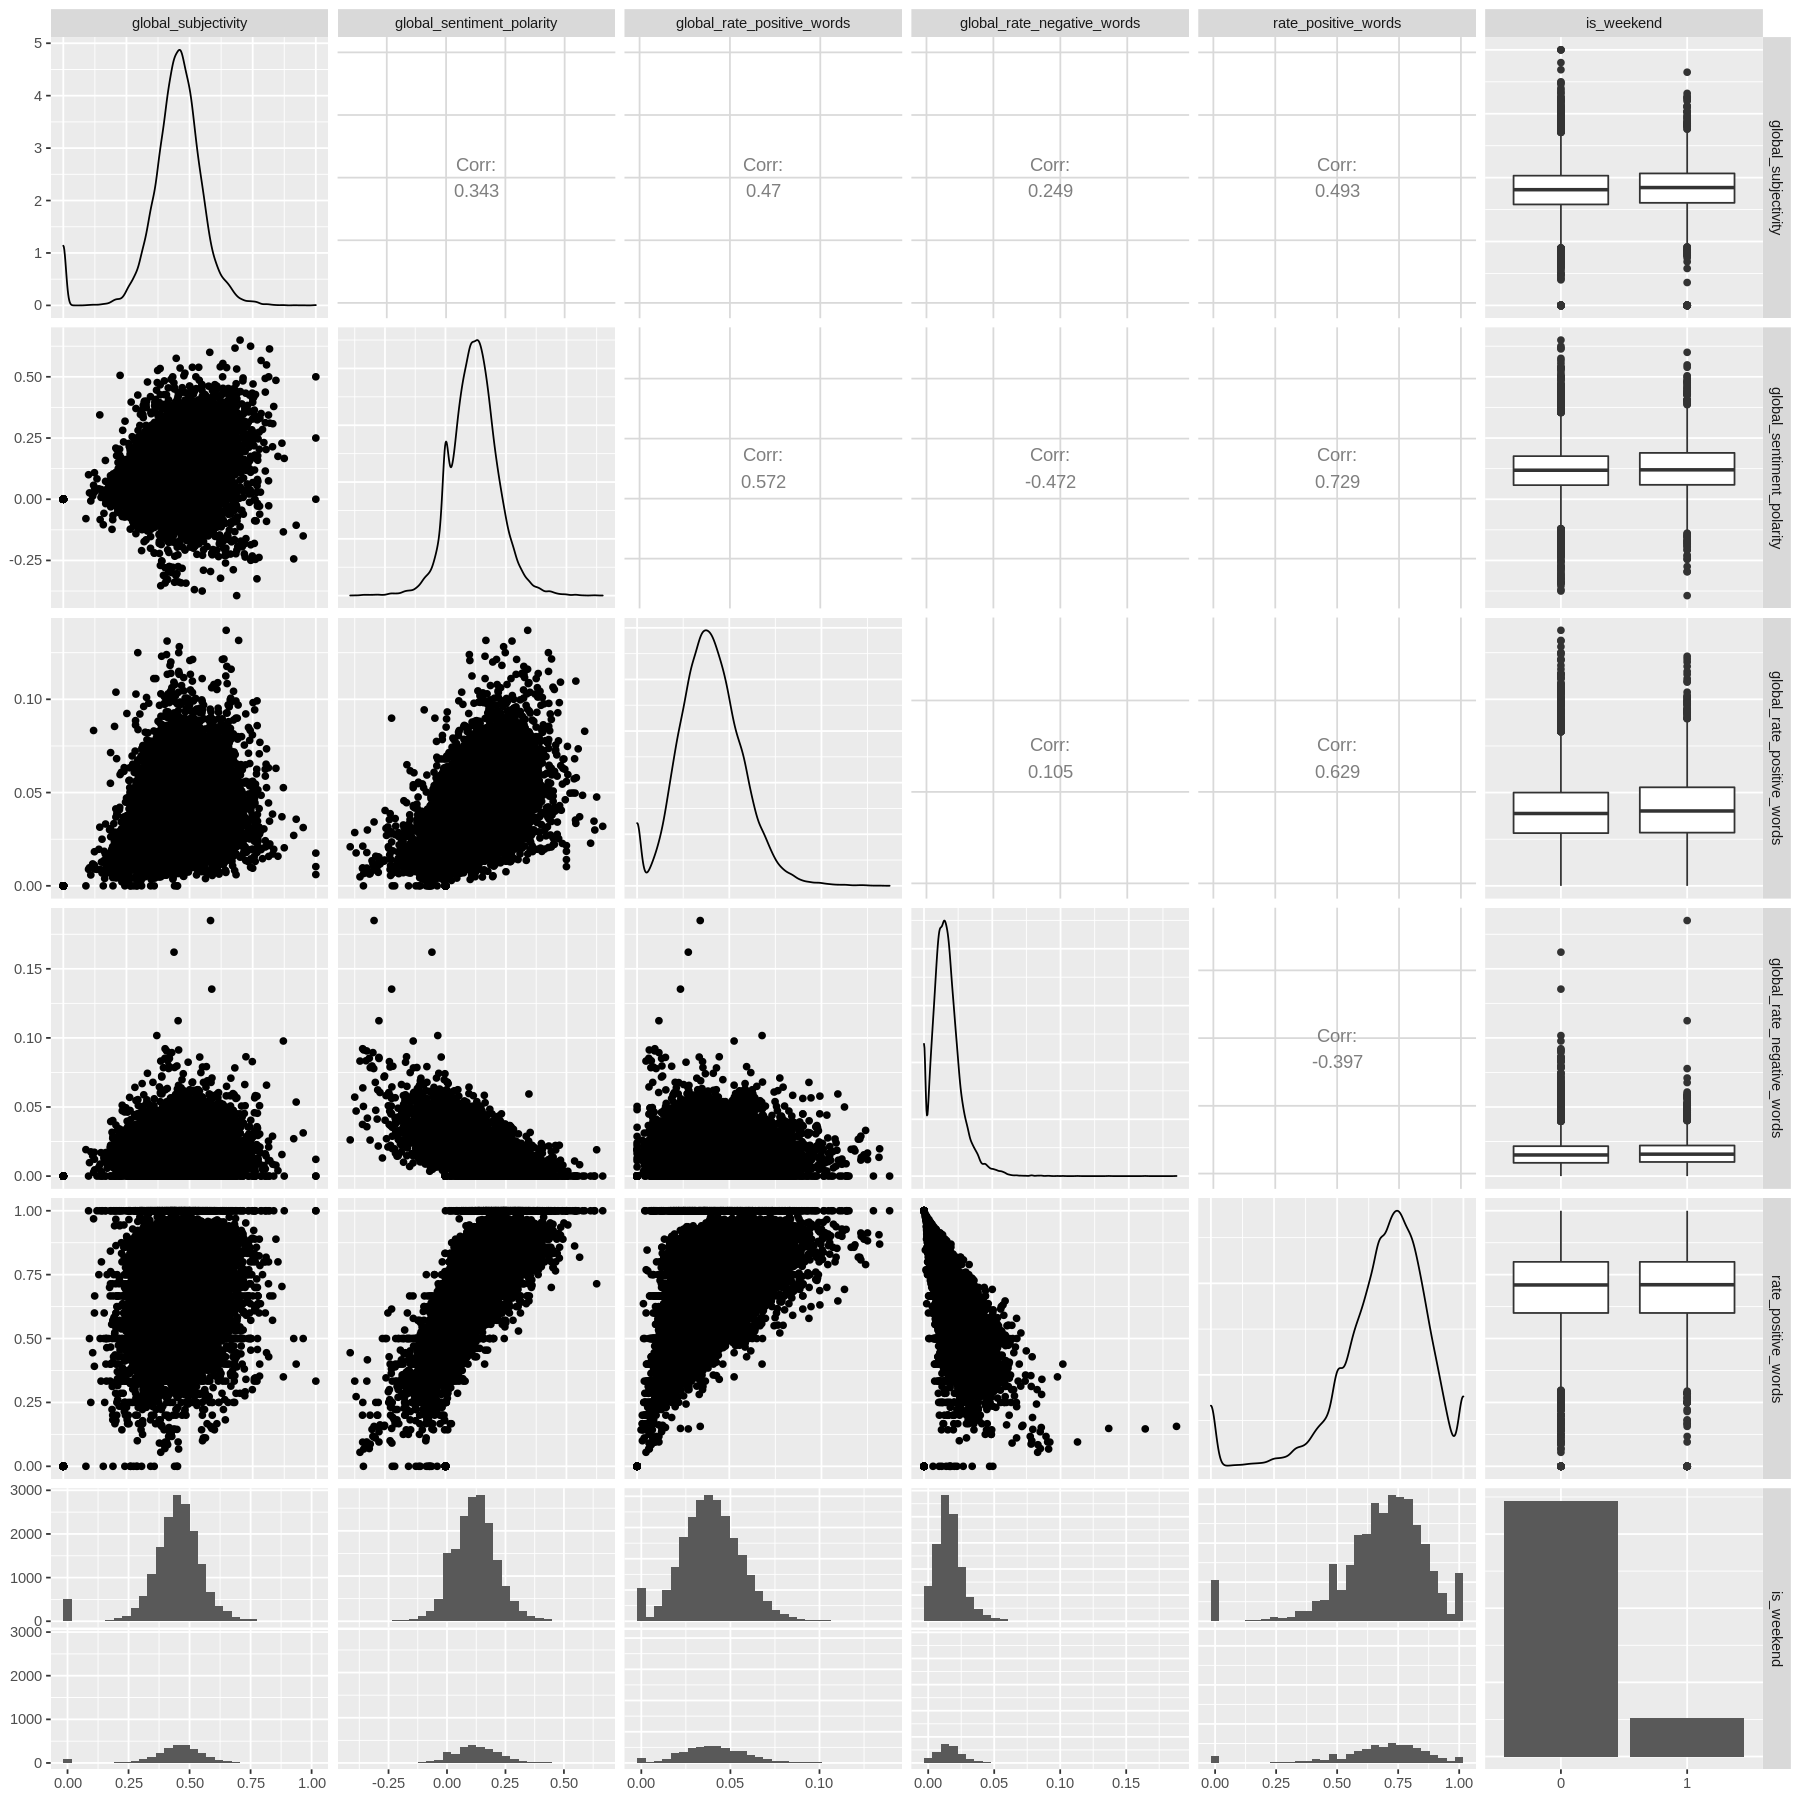

In [9]:
options(repr.plot.width = 15, repr.plot.height = 15)

library(GGally)
news_data_pairs4 <- news_train %>%
  select(global_subjectivity:rate_positive_words, is_weekend) %>%
  ggpairs()
news_data_pairs4

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



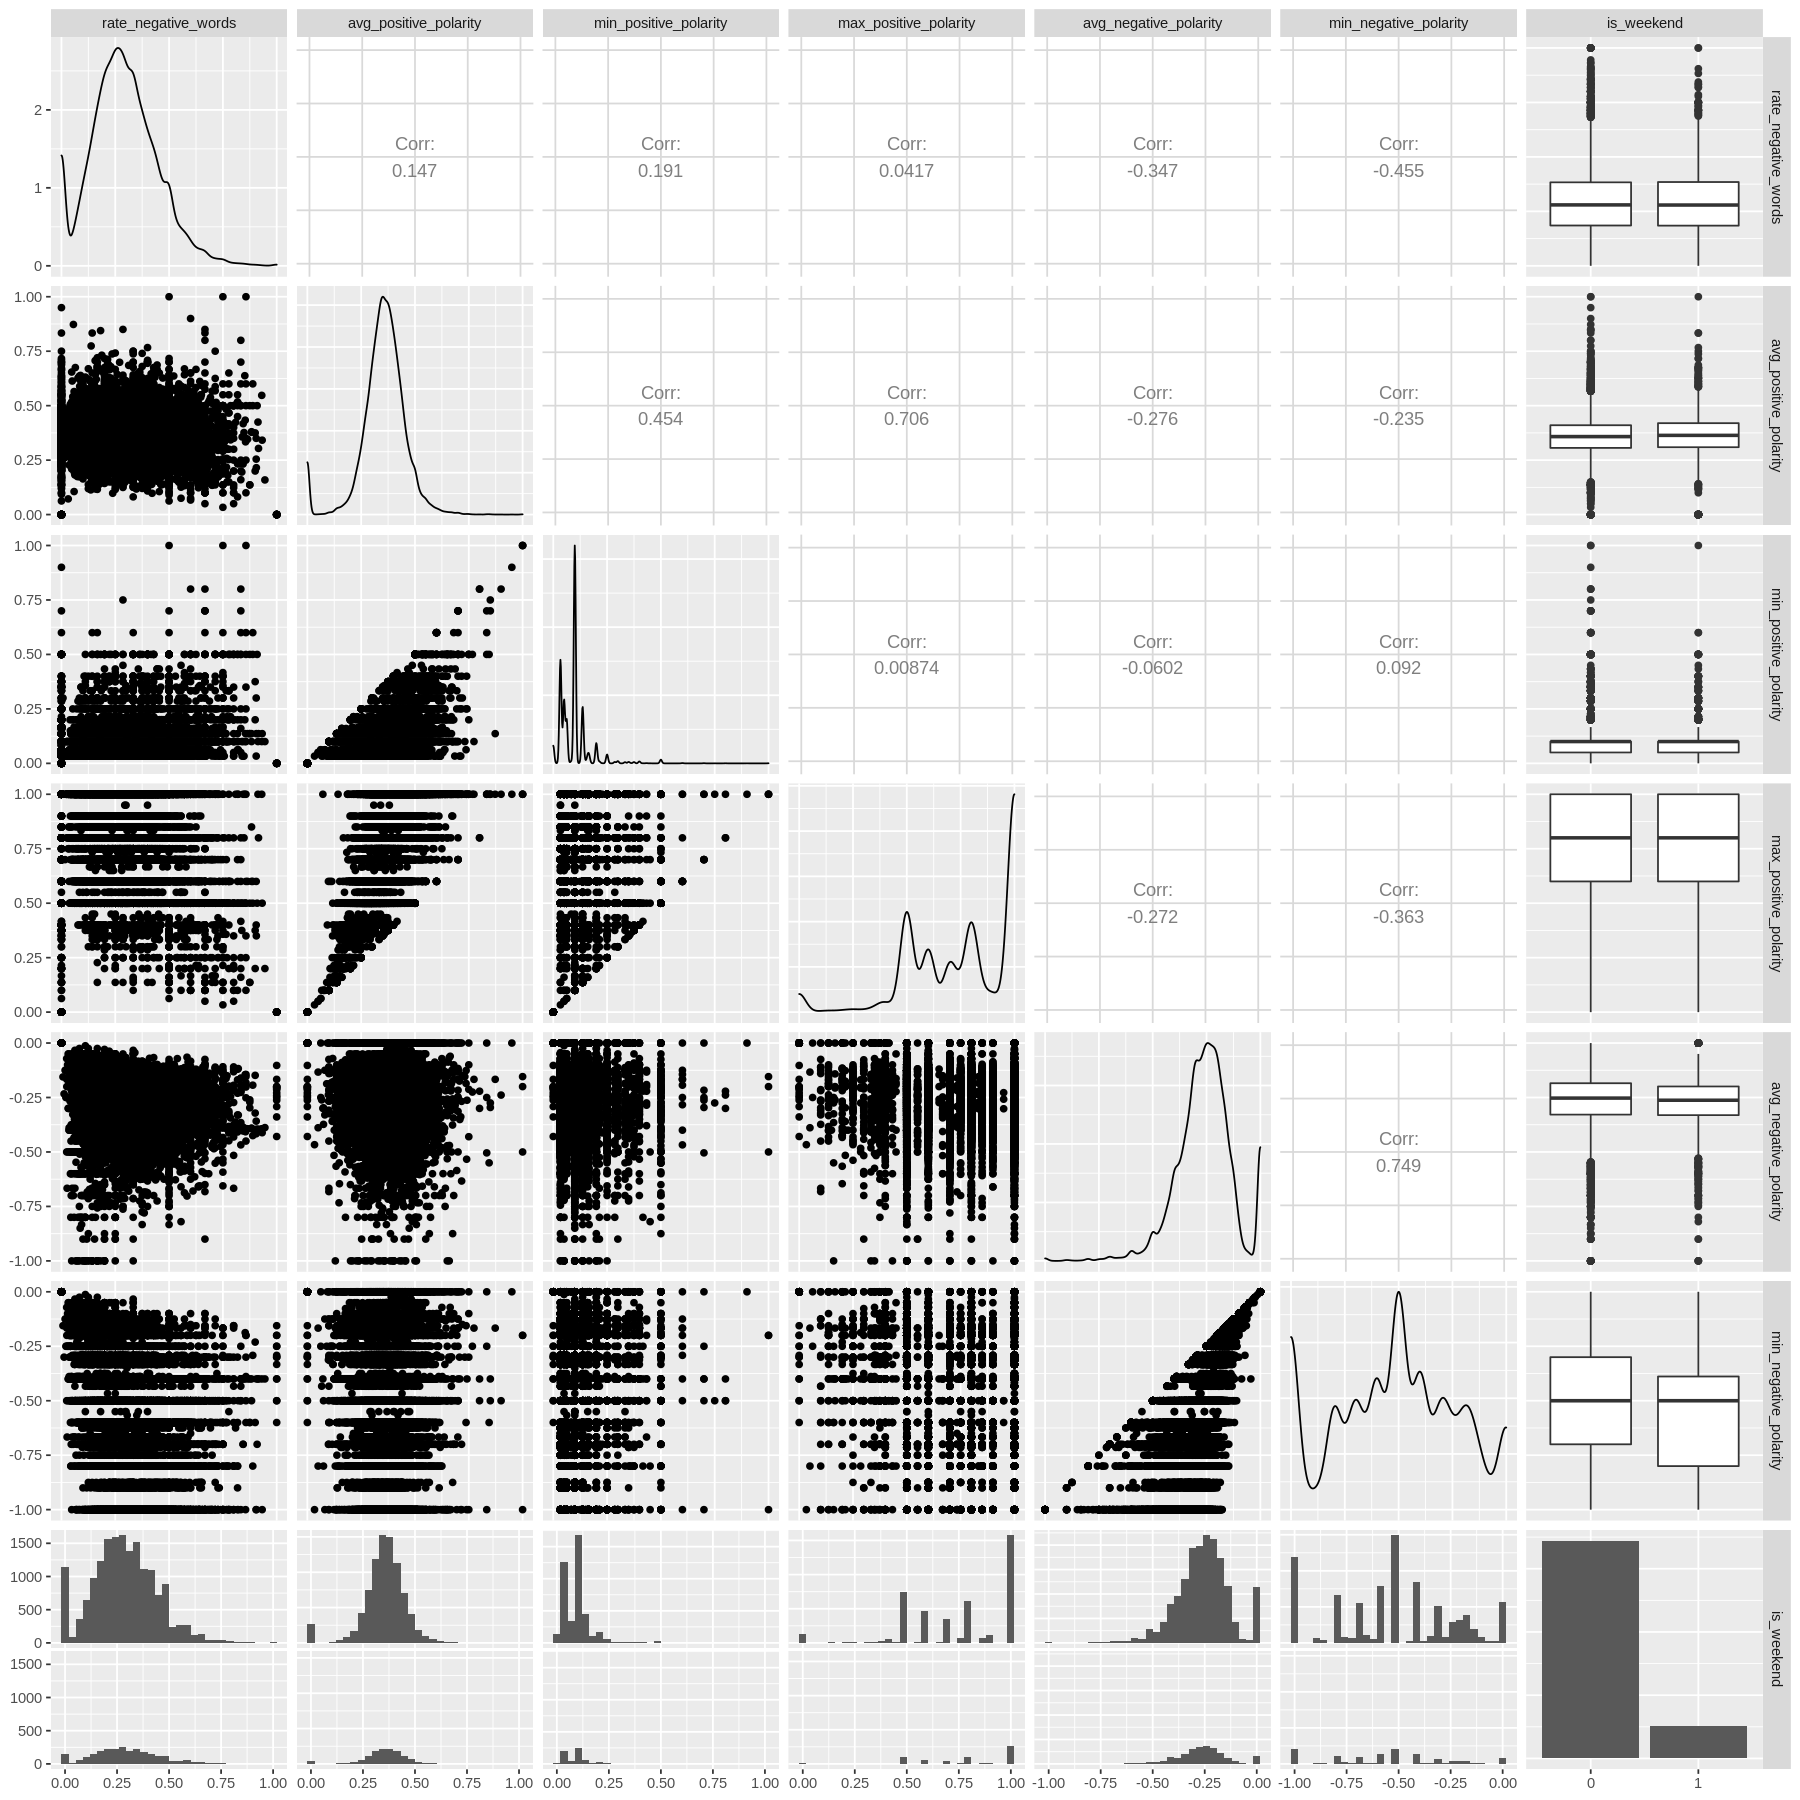

In [10]:
options(repr.plot.width = 15, repr.plot.height = 15)

library(GGally)
news_data_pairs5 <- news_train %>%
  select(rate_negative_words:min_negative_polarity, is_weekend) %>%
  ggpairs()
news_data_pairs5

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



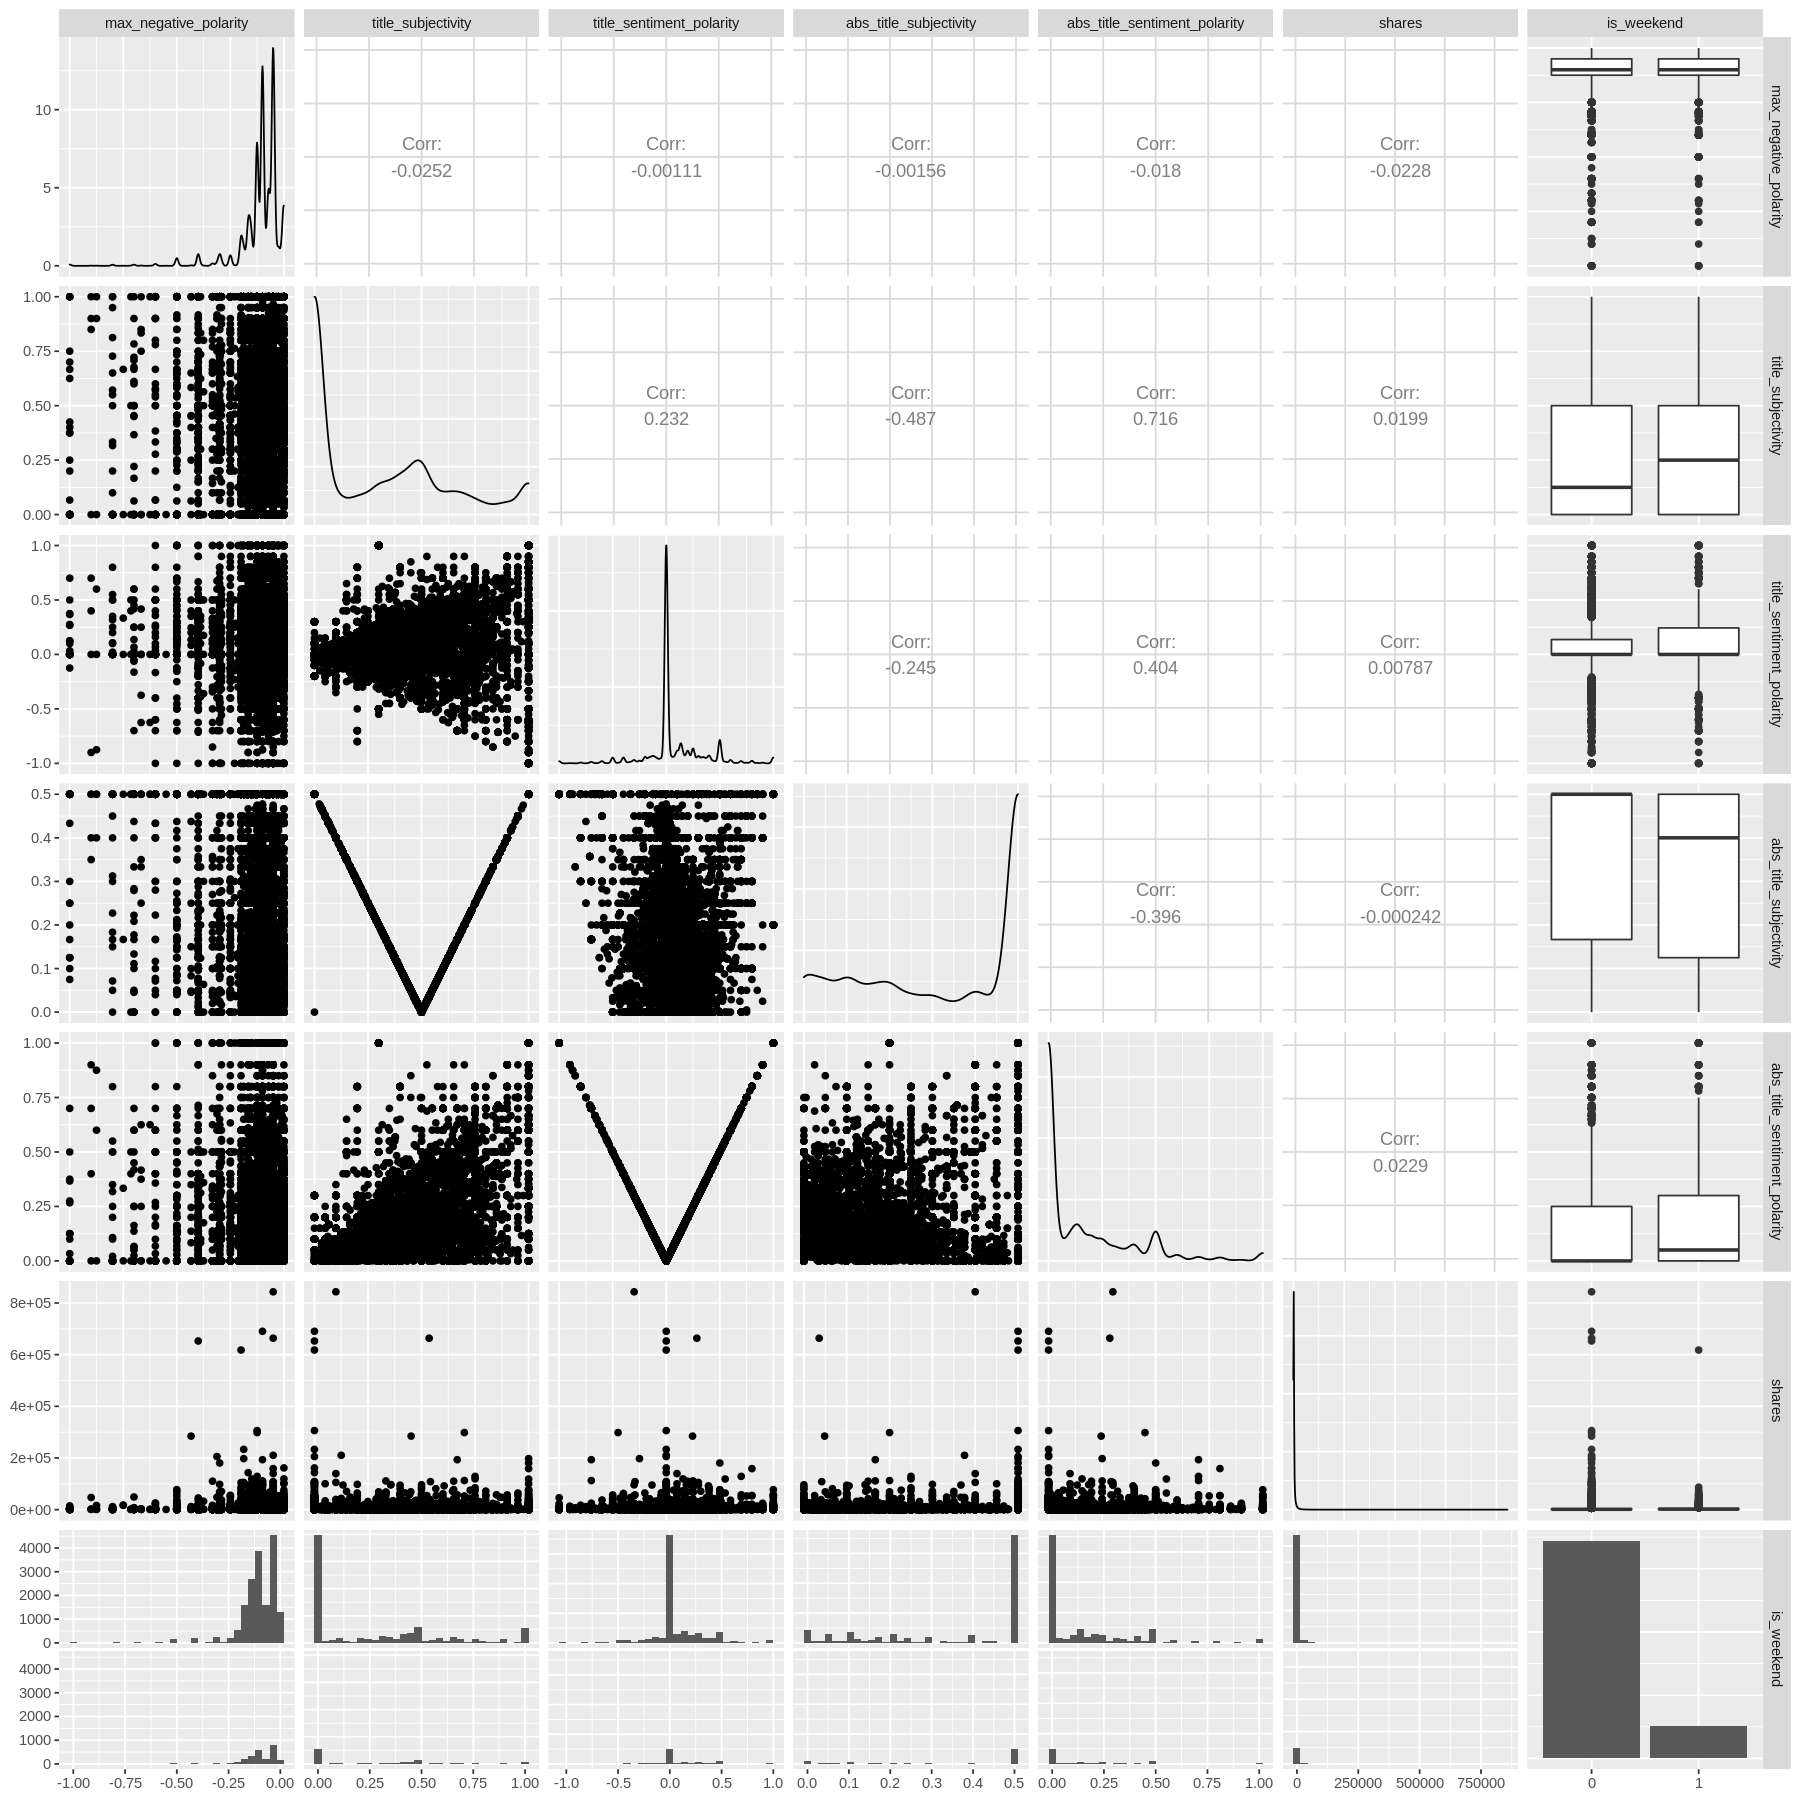

In [11]:
options(repr.plot.width = 15, repr.plot.height = 15)

library(GGally)
news_data_pairs6 <- news_train %>%
  select(max_negative_polarity:shares, is_weekend) %>%
  ggpairs()
news_data_pairs6